**MACHINE LEARNING**

**PART 1:** Loading the fluprint dataset

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

# Load the fluprint dataset 
fluprint = pd.read_csv('/kaggle/input/fluprint/fluprint_machine_learning.csv')
print(fluprint.head())

   bmi  visit_age  vaccine_response
0  NaN       23.0               0.0
1  NaN       28.0               0.0
2  NaN       23.0               0.0
3  NaN       27.0               0.0
4  NaN       27.0               0.0


Check for number of rows and columns

In [8]:
num_rows, num_columns = fluprint.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 740 rows and 3 columns.


**PART 2:** Making train/test data, logistic regression model and accuracy score

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define predictor variables and outcome variable
predictor_variables = ['bmi', 'visit_age']
outcome_variable = 'vaccine_response'

# Drop rows with missing values in predictors or outcome
fluprint_cleaned = fluprint.dropna(subset=predictor_variables + [outcome_variable])

# Split the data into training and test sets
X = fluprint_cleaned[predictor_variables]
y = fluprint_cleaned[outcome_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the predictor variables
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train a logistic regression model
cls_std = LogisticRegression()
cls_std.fit(X_train_std, y_train)

# Calculate accuracy on the test set using the score() method
accuracy = cls_std.score(X_test_std, y_test)

print("Accuracy: {}".format(accuracy))

Accuracy: 0.5384615384615384


Checking the X_train dataset values

In [26]:
X_train_std_df = pd.DataFrame(X_train_std, columns=X_train.columns)
X_train_std_df.head()

,bmi,visit_age
0,1.154341,0.079372
1,-1.401228,-1.441528
2,1.021787,0.165827
3,-1.003565,-0.407598
4,-0.619547,0.832764


Visualizing the spread of values for bmi and age

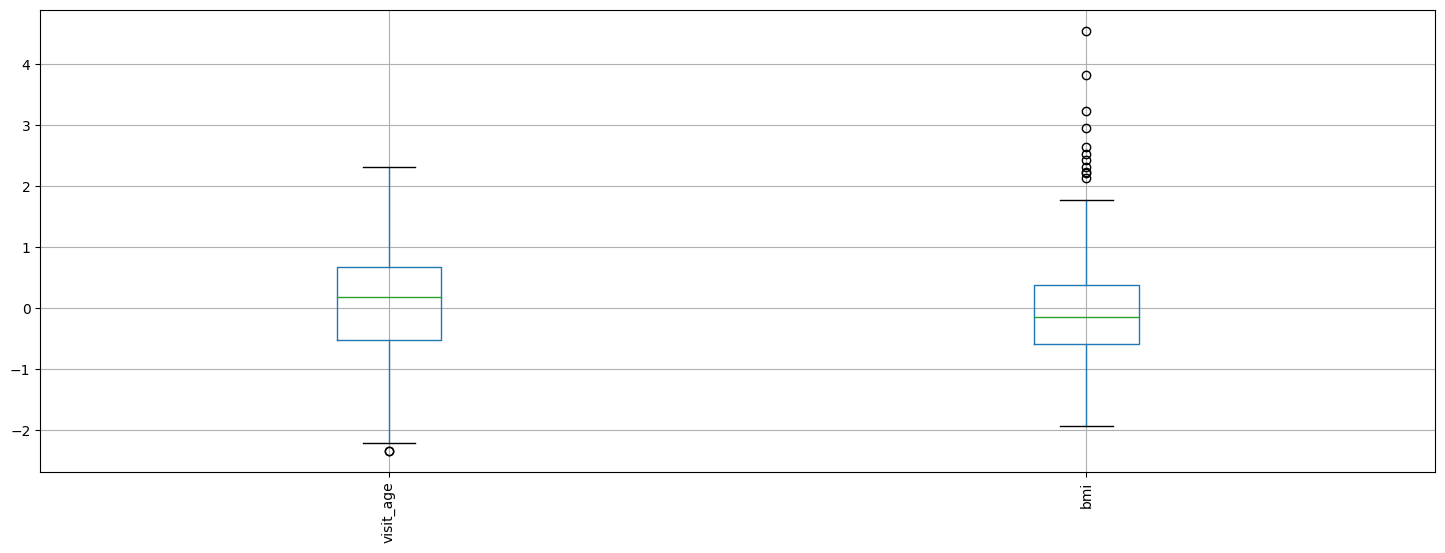

In [24]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(18, 6))

# Sample a subset of 10 features (you can adjust this as needed)
X_train_std_df.sample(2, axis="columns").boxplot()

# Rotate the feature names on the x-axis to make them more readable
plt.xticks(rotation=90)

# Show the plot
plt.show()

**PART 3**: Train Logistic Regression for Feature Importance

In [18]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_std, y_train)

# Extract coefficients and calculate importance
model_parameters = pd.DataFrame({
    'attribute': X.columns,
    'parameter_value': model.coef_[0]
})
model_parameters['parameter_abs_value'] = model_parameters['parameter_value'].abs()

# Sort by absolute value of the coefficients
model_parameters = model_parameters.sort_values(by='parameter_abs_value', ascending=False)
print(model_parameters)

   attribute  parameter_value  parameter_abs_value
1  visit_age         0.325044             0.325044
0        bmi         0.267927             0.267927


**PART 4:** Apply t-SNE for Dimensionality Reduction

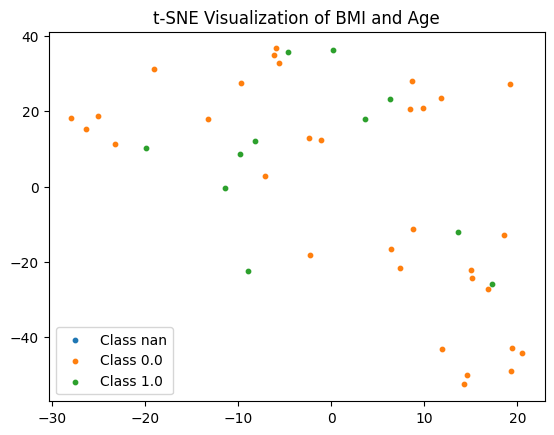

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE on the standardized dataset
tsne_model = TSNE(n_components=2, perplexity=10, random_state=42)
X_embedded = tsne_model.fit_transform(X_train_std)

# Create a DataFrame for visualization
tsne_result = pd.DataFrame(X_embedded, columns=['t-SNE_1', 't-SNE_2'])
tsne_result['label'] = y

# Plot the t-SNE result
fig, ax = plt.subplots()
for label in tsne_result['label'].unique():
    subset = tsne_result[tsne_result['label'] == label]
    ax.scatter(subset['t-SNE_1'], subset['t-SNE_2'], label=f"Class {label}", s=10)
ax.legend()
plt.title("t-SNE Visualization of BMI and Age")
plt.show()